# Análise Exploratória - Sistema E-Saúde
## Perfil de Atendimento Outros Profissionais de Nível Superior

**Projeto de Pós-Graduação**

Este notebook contém a análise exploratória inicial dos dados do Sistema E-Saúde de Curitiba, focando nos atendimentos realizados por profissionais de nível superior (exceto médicos).

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurações para melhor visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 1. Carregamento e Primeira Visualização dos Dados

In [2]:
# Carregando o dataset mais recente (Julho 2025)
df = pd.read_csv('Dados/2025-07-06_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.csv', 
                 sep=';', encoding='latin1')

print(f"Dataset carregado com {df.shape[0]} registros e {df.shape[1]} colunas")
print("\nPrimeiras 5 linhas:")
df.head()

Dataset carregado com 54019 registros e 42 colunas

Primeiras 5 linhas:


,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,Descrição do CBO,Código do CID,Descrição do CID,Solicitação de Exames,Qtde Prescrita Farmácia Curitibana,Qtde Dispensada Farmácia Curitibana,Qtde de Medicamento Não Padronizado,Encaminhamento para Atendimento Especialista,Área de Atuação,Desencadeou Internamento,Data do Internamento,Estabelecimento Solicitante,Estabelecimento Destino,CID do Internamento,Tratamento no Domicílio,Abastecimento,Energia Elétrica,Tipo de Habitação,Destino Lixo,Fezes/Urina,Cômodos,Em Caso de Doença,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional
0,05/03/2025 15:43:37,27/01/2001 00:00:00,F,3,SIACE,2639513,UMS COA CENTRO DE ORIENTACAO E ACONSELHAMENTO,301010048,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO ESPECIALIZADA (EXCETO MEDICO),251510,PSICOLOGO CLINICO,NaN,NaN,Nao,0,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,CLORACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,UNIDADE DE SAUDE,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,ALTO BOQUEIRAO,Brasileira,1645648,1,1,44433
1,05/03/2025 16:33:16,27/11/1963 00:00:00,M,3,SIACE,2639513,UMS COA CENTRO DE ORIENTACAO E ACONSELHAMENTO,301010048,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO ESPECIALIZADA (EXCETO MEDICO),251510,PSICOLOGO CLINICO,NaN,NaN,Nao,0,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,6.0,HOSPITAL,GRUPO RELIGIOSO,TELEVISAO,ONIBUS,CURITIBA,TINGUI,Brasileira,1489447,1,1,44433
2,05/03/2025 16:27:49,10/05/2012 00:00:00,F,1,BASICO,16810,UMS JARDIM GABINETO PSF,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO PRIMARIA (EXCETO MEDICO),223710,NUTRICIONISTA,NaN,NaN,Sim,0,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,UNIDADE DE SAUDE,NAO PARTICIPA,"TELEVISAO,RADIO","ONIBUS,CAMINHAO",CURITIBA,CIDADE INDUSTRIAL,Brasileira,8517006,1,1,128205
3,05/03/2025 15:20:12,30/12/1995 00:00:00,F,1,BASICO,2639378,UMS BAIRRO ALTO,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO PRIMARIA (EXCETO MEDICO),223710,NUTRICIONISTA,NaN,NaN,Sim,0,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,FILTRACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,HOSPITAL,NAO PARTICIPA,RADIO,ONIBUS,CURITIBA,BAIRRO ALTO,Brasileira,8056229,1,1,44889
4,05/03/2025 15:28:45,14/03/1970 00:00:00,F,1,BASICO,16845,UMS SAO BRAZ,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO PRIMARIA (EXCETO MEDICO),223810,FONOAUDIOLOGO GERAL,NaN,NaN,Sim,0,0,0,Nao,NaN,Nao,NaN,NaN,NaN,NaN,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,UNIDADE DE SAUDE,OUTROS,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,SAO BRAZ,Brasileira,1574023,1,1,60100


In [3]:
# Informações básicas sobre o dataset
print("Informações do Dataset:")
print("=" * 50)
print(f"Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"\nTipos de dados:")
print(df.dtypes.value_counts())
print(f"\nColunas com valores nulos:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Informações do Dataset:
Dimensões: 54019 linhas x 42 colunas

Tipos de dados:
object     26
int64      11
float64     5
Name: count, dtype: int64

Colunas com valores nulos:
Código do CID                  54018
Descrição do CID               54018
Área de Atuação                39325
Data do Internamento           54019
Estabelecimento Solicitante    54019
Estabelecimento Destino        54019
CID do Internamento            54019
Tratamento no Domicílio         8964
Abastecimento                   9096
Tipo de Habitação               9052
Destino Lixo                    9084
Fezes/Urina                     9177
Cômodos                          954
Em Caso de Doença               9031
Grupo Comunitário               9280
Meio de Comunicacao             9119
Meio de Transporte              9127
dtype: int64


## 2. Análise das Variáveis Principais

Distribuição por Tipo de Unidade:
Tipo de Unidade
BASICO    44167
SIACE      9835
UPA          17
Name: count, dtype: int64


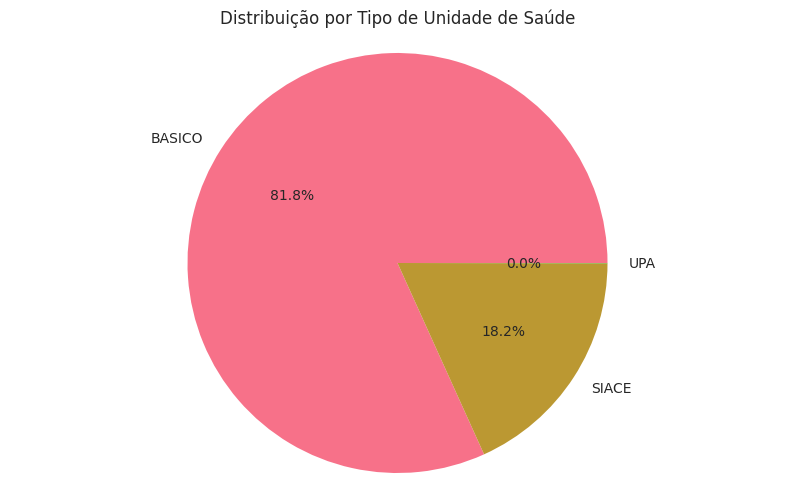

In [4]:
# Análise dos tipos de unidades de saúde
print("Distribuição por Tipo de Unidade:")
print("=" * 40)
tipo_unidade_counts = df['Tipo de Unidade'].value_counts()
print(tipo_unidade_counts)

# Gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie(tipo_unidade_counts.values, labels=tipo_unidade_counts.index, autopct='%1.1f%%')
plt.title('Distribuição por Tipo de Unidade de Saúde')
plt.axis('equal')
plt.show()

Top 10 Profissionais por Volume de Atendimentos:
Descrição do CBO
FISIOTERAPEUTA GERAL                        19156
PSICOLOGO CLINICO                           12209
NUTRICIONISTA                                7840
FONOAUDIOLOGO GERAL                          4405
FARMACEUTICO HOSPITALAR E CLINICO            4238
PROFISSIONAL DE EDUCACAO FISICA NA SAUDE     2851
FARMACEUTICO                                 1867
TERAPEUTA OCUPACIONAL                        1046
ASSISTENTE SOCIAL                             208
FARMACEUTICO ANALISTA CLINICO                 199
Name: count, dtype: int64


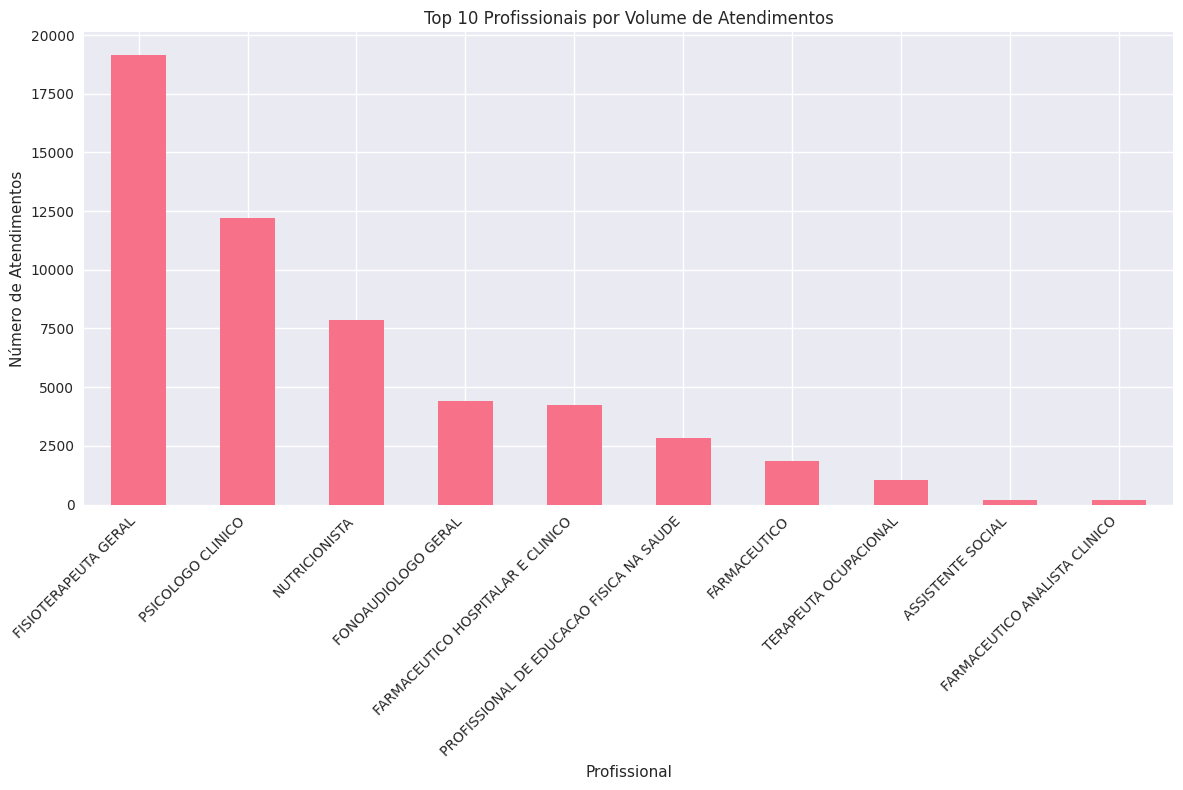

In [5]:
# Análise dos profissionais (CBO)
print("Top 10 Profissionais por Volume de Atendimentos:")
print("=" * 50)
cbo_counts = df['Descrição do CBO'].value_counts().head(10)
print(cbo_counts)

# Gráfico de barras
plt.figure(figsize=(12, 8))
cbo_counts.plot(kind='bar')
plt.title('Top 10 Profissionais por Volume de Atendimentos')
plt.xlabel('Profissional')
plt.ylabel('Número de Atendimentos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Distribuição por Sexo:
Sexo
F    33123
M    20896
Name: count, dtype: int64


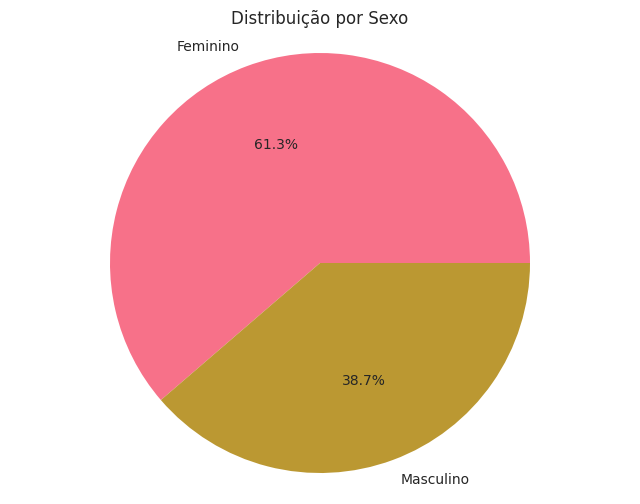

In [6]:
# Análise por sexo
print("Distribuição por Sexo:")
print("=" * 30)
sexo_counts = df['Sexo'].value_counts()
print(sexo_counts)

# Gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sexo_counts.values, labels=['Feminino', 'Masculino'], autopct='%1.1f%%')
plt.title('Distribuição por Sexo')
plt.axis('equal')
plt.show()

## 3. Análise Temporal

In [7]:
# Convertendo datas
df['Data do Atendimento'] = pd.to_datetime(df['Data do Atendimento'], format='%d/%m/%Y %H:%M:%S')
df['Data de Nascimento'] = pd.to_datetime(df['Data de Nascimento'], format='%d/%m/%Y %H:%M:%S')

# Extraindo informações temporais
df['Dia da Semana'] = df['Data do Atendimento'].dt.day_name()
df['Hora'] = df['Data do Atendimento'].dt.hour
df['Mês'] = df['Data do Atendimento'].dt.month

# Calculando idade
df['Idade'] = (df['Data do Atendimento'] - df['Data de Nascimento']).dt.total_seconds() / (365.25 * 24 * 3600)

print("Análise Temporal dos Atendimentos:")
print("=" * 40)
print(f"Período: {df['Data do Atendimento'].min()} a {df['Data do Atendimento'].max()}")
print(f"Total de dias: {(df['Data do Atendimento'].max() - df['Data do Atendimento'].min()).days}")

Análise Temporal dos Atendimentos:
Período: 2025-03-05 14:30:29 a 2025-05-31 11:33:18
Total de dias: 86


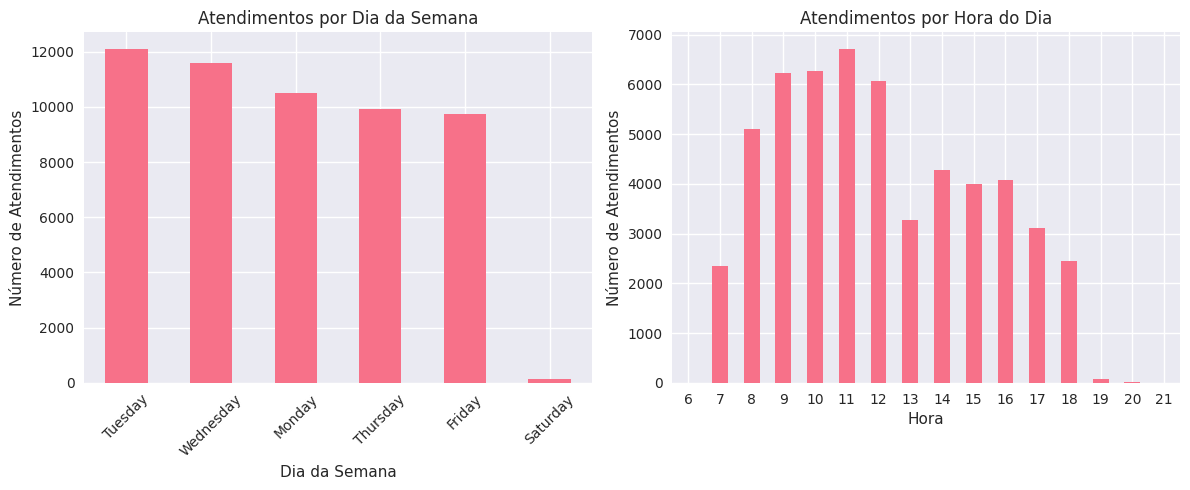

In [8]:
# Distribuição por dia da semana
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
dia_semana_counts = df['Dia da Semana'].value_counts()
dia_semana_counts.plot(kind='bar')
plt.title('Atendimentos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Atendimentos')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
hora_counts = df['Hora'].value_counts().sort_index()
hora_counts.plot(kind='bar')
plt.title('Atendimentos por Hora do Dia')
plt.xlabel('Hora')
plt.ylabel('Número de Atendimentos')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## 4. Análise Geográfica

Top 15 Bairros por Volume de Atendimentos:
Bairro
CIDADE INDUSTRIAL    7470
SITIO CERCADO        4249
CAJURU               3106
UBERABA              2776
BOQUEIRAO            2104
TATUQUARA            2100
ALTO BOQUEIRAO       1937
PINHEIRINHO          1781
XAXIM                1525
BAIRRO ALTO          1434
NOVO MUNDO           1349
CAMPO DE SANTANA     1276
PILARZINHO           1268
SANTA CANDIDA        1147
CENTRO               1144
Name: count, dtype: int64


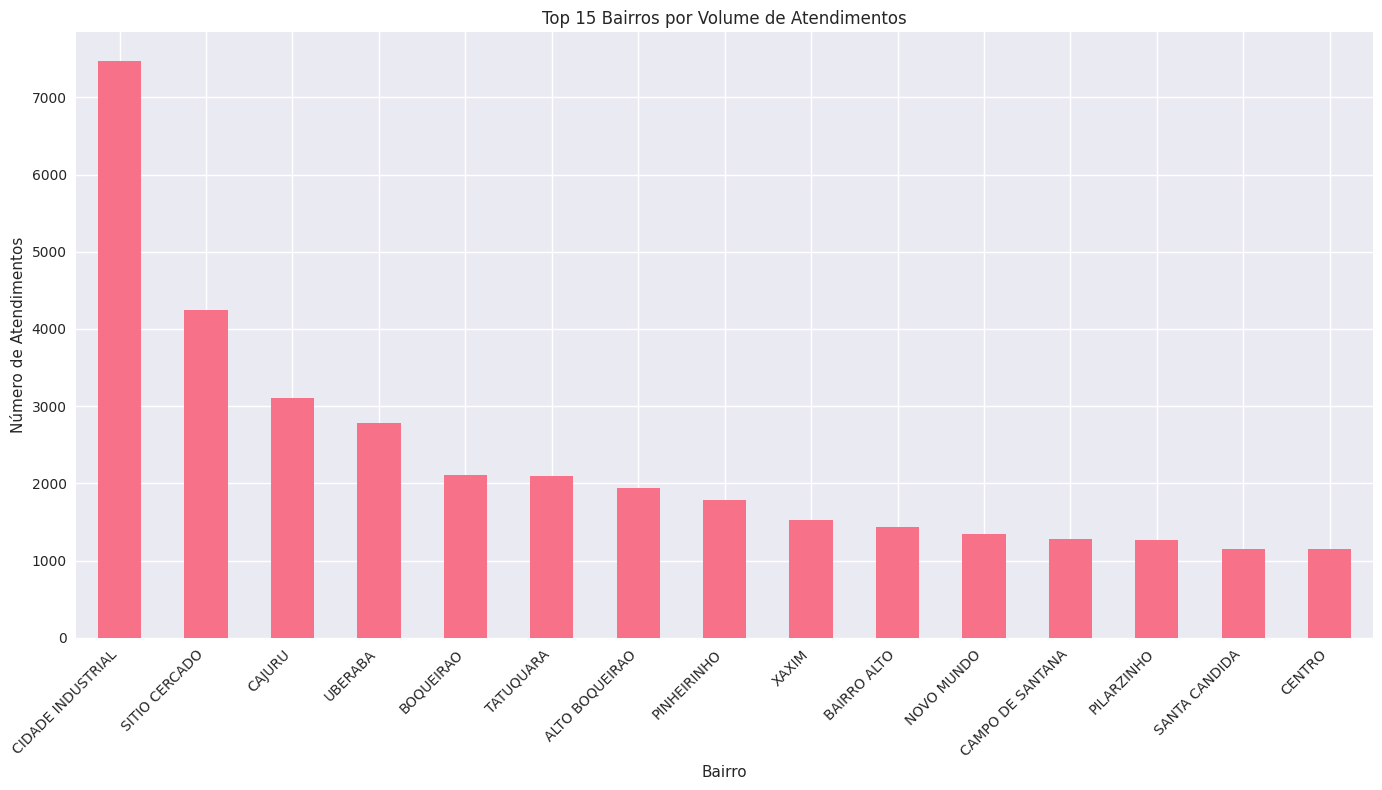

In [9]:
# Top bairros por volume de atendimentos
print("Top 15 Bairros por Volume de Atendimentos:")
print("=" * 45)
bairro_counts = df['Bairro'].value_counts().head(15)
print(bairro_counts)

# Gráfico de barras
plt.figure(figsize=(14, 8))
bairro_counts.plot(kind='bar')
plt.title('Top 15 Bairros por Volume de Atendimentos')
plt.xlabel('Bairro')
plt.ylabel('Número de Atendimentos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5. Análise de Procedimentos

Top 10 Procedimentos Realizados:
Descrição do Procedimento
CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO PRIMARIA (EXCETO MEDICO)         35564
CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO ESPECIALIZADA (EXCETO MEDICO)     9850
PROCEDIMENTO ADMINISTRATIVO                                                              6971
TELECONSULTA NA ATENCAO PRIMARIA                                                         1019
CONSULTA/ATENDIMENTO DOMICILIAR                                                           383
REGISTRO DE DADOS DO IVCF                                                                  72
CENTRAL DE TELEATENDIMENTO                                                                 56
ABORDAGEM COGNITIVA COMPORTAMENTAL DO FUMANTE (POR ATENDIMENTO / PACIENTE)                 32
AVALIACAO ANTROPOMETRICA                                                                   31
AVALIACAO MULTIDIMENSIONAL DA PESSOA IDOSA                                                 25
N

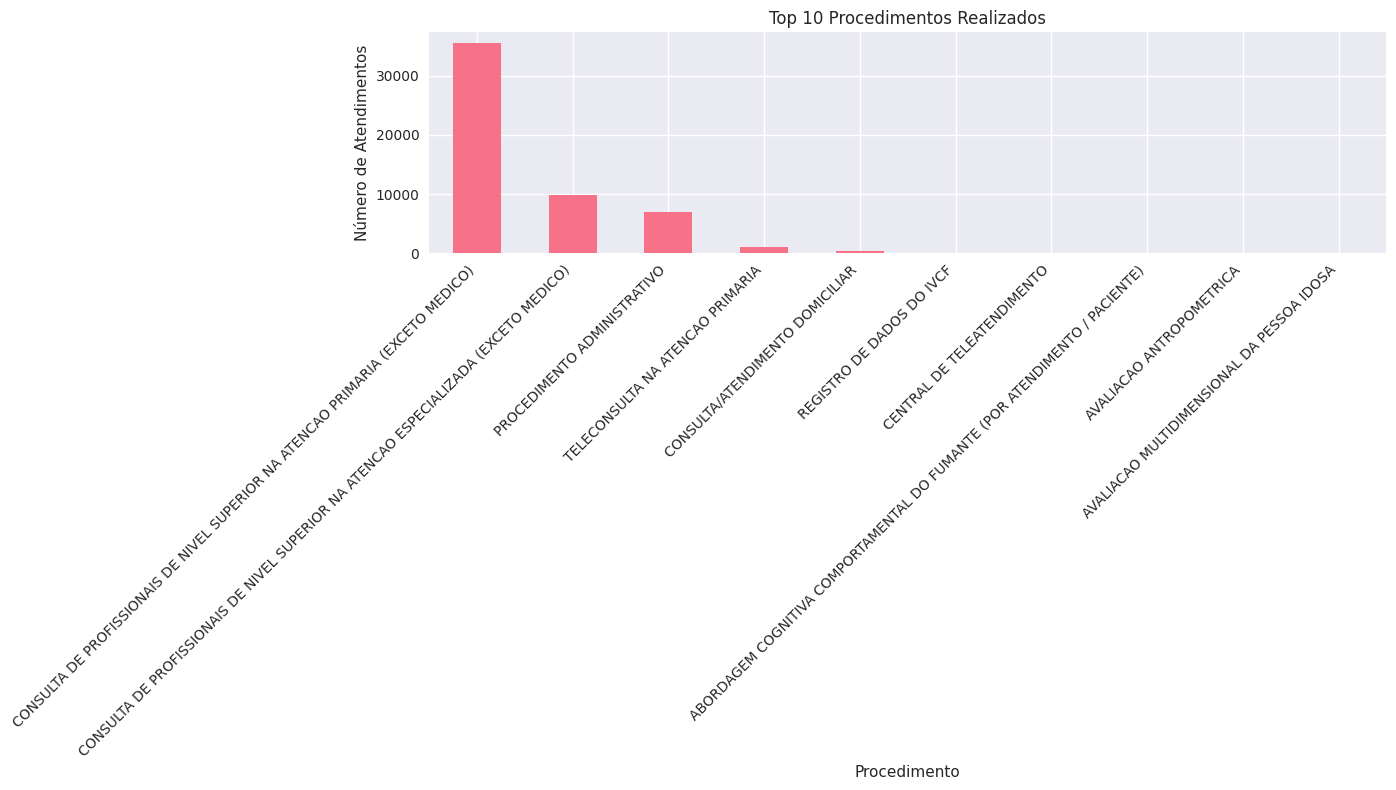

In [10]:
# Top procedimentos realizados
print("Top 10 Procedimentos Realizados:")
print("=" * 40)
procedimento_counts = df['Descrição do Procedimento'].value_counts().head(10)
print(procedimento_counts)

# Gráfico de barras
plt.figure(figsize=(14, 8))
procedimento_counts.plot(kind='bar')
plt.title('Top 10 Procedimentos Realizados')
plt.xlabel('Procedimento')
plt.ylabel('Número de Atendimentos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6. Análise de Condições Socioeconômicas

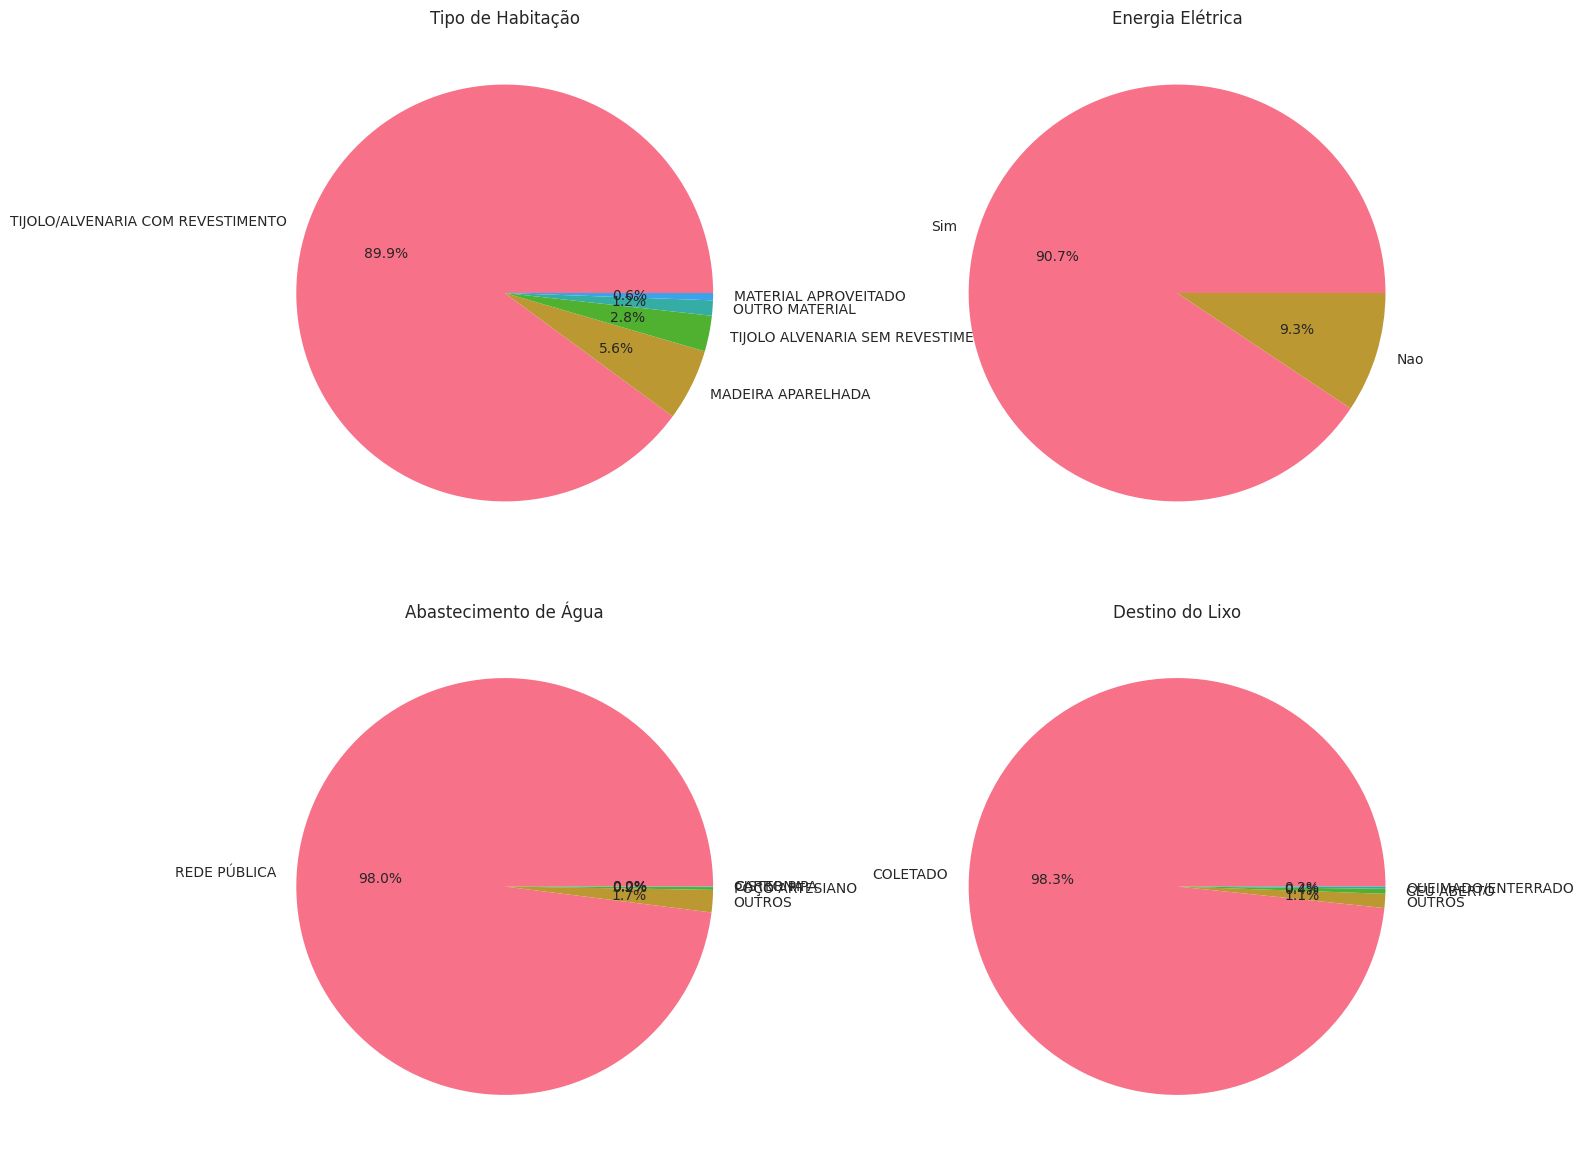

In [11]:
# Análise de condições habitacionais
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Tipo de habitação
hab_counts = df['Tipo de Habitação'].value_counts().head(5)
axes[0,0].pie(hab_counts.values, labels=hab_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('Tipo de Habitação')

# Energia elétrica
energia_counts = df['Energia Elétrica'].value_counts()
axes[0,1].pie(energia_counts.values, labels=energia_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Energia Elétrica')

# Abastecimento de água
agua_counts = df['Abastecimento'].value_counts().head(5)
axes[1,0].pie(agua_counts.values, labels=agua_counts.index, autopct='%1.1f%%')
axes[1,0].set_title('Abastecimento de Água')

# Destino do lixo
lixo_counts = df['Destino Lixo'].value_counts().head(5)
axes[1,1].pie(lixo_counts.values, labels=lixo_counts.index, autopct='%1.1f%%')
axes[1,1].set_title('Destino do Lixo')

plt.tight_layout()
plt.show()

## 7. Resumo Estatístico

Estatísticas da Idade dos Pacientes:
count    54019.000000
mean        42.272330
std         25.218777
min          0.017659
25%         17.148416
50%         46.463423
75%         63.349418
max        101.430578
Name: Idade, dtype: float64


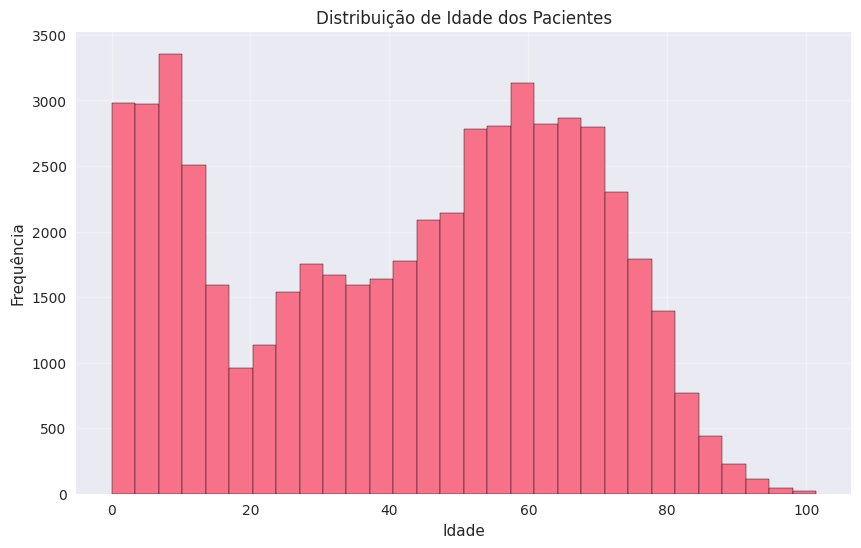

In [12]:
# Estatísticas descritivas da idade
print("Estatísticas da Idade dos Pacientes:")
print("=" * 40)
print(df['Idade'].describe())

# Distribuição de idade
plt.figure(figsize=(10, 6))
plt.hist(df['Idade'].dropna(), bins=30, edgecolor='black')
plt.title('Distribuição de Idade dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
# Resumo final
print("RESUMO DA ANÁLISE EXPLORATÓRIA")
print("=" * 50)
print(f"Total de atendimentos analisados: {len(df):,}")
print(f"Período: {df['Data do Atendimento'].min().strftime('%d/%m/%Y')} a {df['Data do Atendimento'].max().strftime('%d/%m/%Y')}")
print(f"Unidades de saúde únicas: {df['Código da Unidade'].nunique()}")
print(f"Profissionais únicos: {df['cod_profissional'].nunique()}")
print(f"Pacientes únicos: {df['cod_usuario'].nunique()}")
print(f"Bairros atendidos: {df['Bairro'].nunique()}")
print(f"Tipos de procedimentos: {df['Código do Procedimento'].nunique()}")
print(f"\nPrincipais insights:")
print(f"- Profissional mais ativo: {df['Descrição do CBO'].value_counts().index[0]}")
print(f"- Bairro com mais atendimentos: {df['Bairro'].value_counts().index[0]}")
print(f"- Procedimento mais comum: {df['Descrição do Procedimento'].value_counts().index[0]}")
print(f"- Média de idade dos pacientes: {df['Idade'].mean():.1f} anos")

RESUMO DA ANÁLISE EXPLORATÓRIA
Total de atendimentos analisados: 54,019
Período: 05/03/2025 a 31/05/2025
Unidades de saúde únicas: 117
Profissionais únicos: 203
Pacientes únicos: 32482
Bairros atendidos: 100
Tipos de procedimentos: 15

Principais insights:
- Profissional mais ativo: FISIOTERAPEUTA GERAL
- Bairro com mais atendimentos: CIDADE INDUSTRIAL
- Procedimento mais comum: CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO PRIMARIA (EXCETO MEDICO)
- Média de idade dos pacientes: 42.3 anos
